In [27]:

"""
Quick EDA using Pandas, Seaborn and Matplotlib for data handling and visualizations.
Spark will be used later for ML model.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Load data
df = pd.read_csv("../data/tumor_classification_data.csv")

In [29]:
# View basic structure
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.head())

(569, 32)
Index(['id', 'diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
id                           int64
diagnosis                   object
Radius_mean                float64
Texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean      

In [30]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Basic summary stats
print("\nSummary statistics:\n", df.describe())




Missing values:
 id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Summary statistics:
                  id

In [31]:
# Class distribution
print("\nClass distribution:\n", df["diagnosis"].value_counts())


Class distribution:
 diagnosis
B    357
M    212
Name: count, dtype: int64


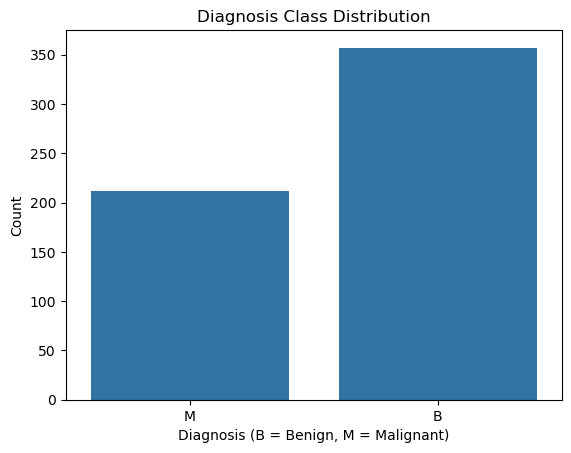

In [32]:
# Plot class distribution
sns.countplot(x="diagnosis", data=df)
plt.title("Diagnosis Class Distribution")
plt.xlabel("Diagnosis (B = Benign, M = Malignant)")
plt.ylabel("Count")
plt.show()


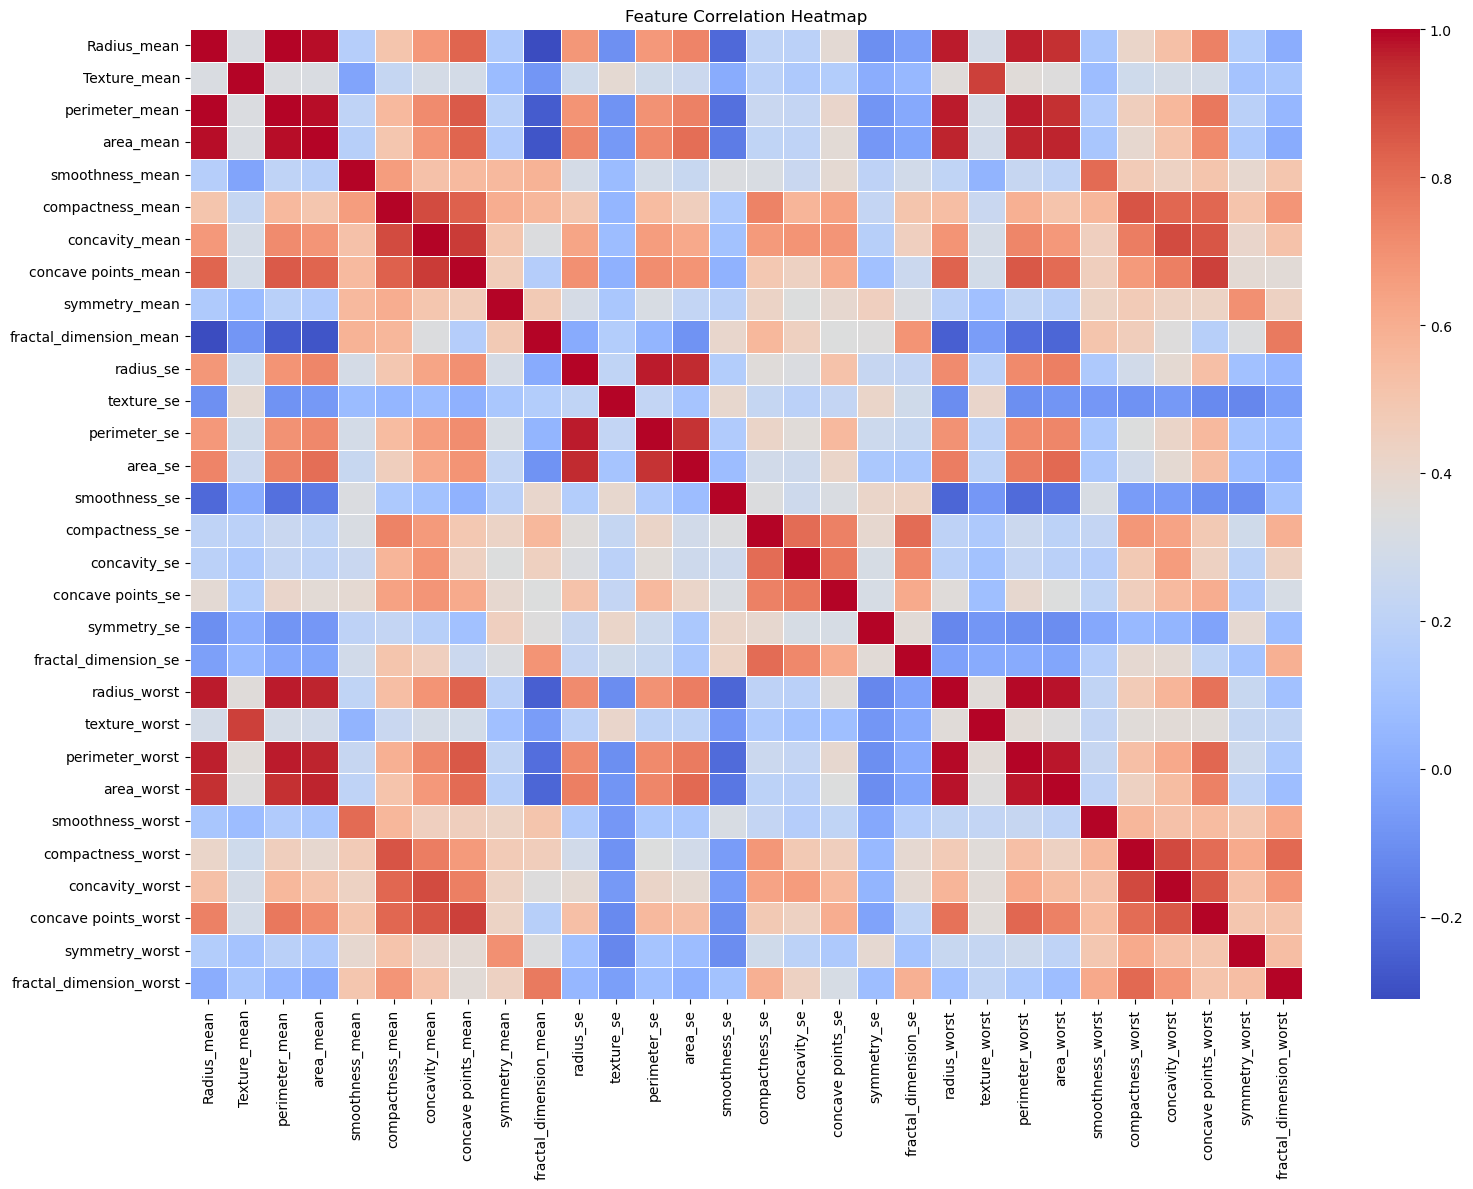

In [33]:
# Correlation heatmap of features
plt.figure(figsize=(16, 12))
# Remove non-numeric columns
numeric_df = df.drop(columns=["id", "diagnosis"])
corr = numeric_df.corr()

sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

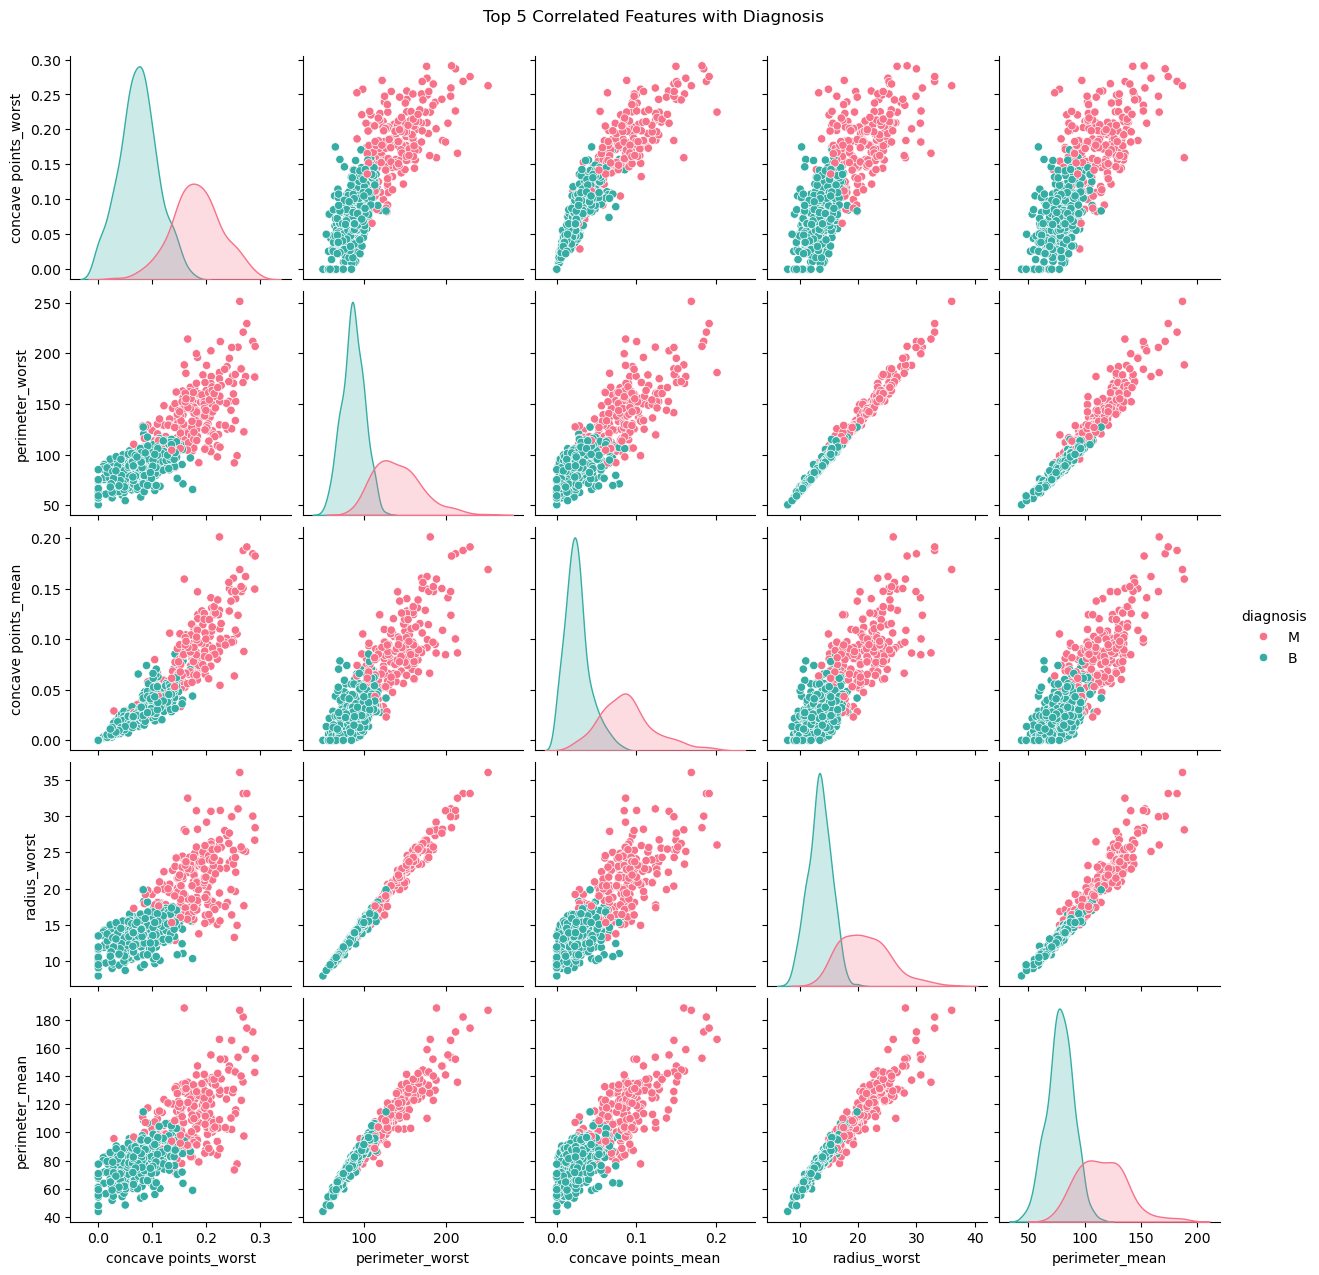

In [35]:
# Convert diagnosis to numeric for correlation
df['diagnosis_numeric'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Only use numeric columns (drop 'id' and 'diagnosis')
numeric_df = df.drop(columns=['id', 'diagnosis'])

# Correlations with diagnosis_numeric
correlations = numeric_df.corr()['diagnosis_numeric'].abs().sort_values(ascending=False)

# Get top 5 features most correlated with diagnosis (excluding the target itself)
top_features = correlations[1:6].index.tolist()  # Skip 'diagnosis_numeric'

# Pairplot of the top features
sns.pairplot(df, vars=top_features, hue="diagnosis", palette="husl")
plt.suptitle("Top 5 Correlated Features with Diagnosis", y=1.02)
plt.show()
